**Objective**: Build an XGBoost model for predicting heart disease and experiment with hyperparameter tuning to improve its performance.

Dataset: [Heart Disease UCI](https://archive.ics.uci.edu/dataset/45/heart+disease)

# Task 1: Data Loading and Exploration
1. Load the Heart Disease UCI dataset.
2. Explore the dataset to understand its structure and features.
3. Split the data into training and testing sets.

In [1]:
# insert code here
#!pip3 install -U ucimlrepo 

from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.impute import SimpleImputer
column_name= (' age','sex', 'cp', 'trestbps', ' fbs','restecg', 'thalach', 'exang', ' oldpeak', 'slope', 'ca','thal','num')
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 


# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

#split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print (X_test.shape)
print(X_train.shape)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

# Task 2: Data Preprocessing
1. Handle missing values if any.
2.Encode categorical variables using appropriate methods 
3. Standardize or normalize numerical features if necessary.

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Check for missing values
print(X.isnull().sum())

# Handle missing values (if any)
# Let's use SimpleImputer to fill missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)
# Now X_train_imputed and X_test_imputed don't have missing values
print(X_train_imputed.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


In [3]:
categorical_features=['sex', 'cp', 'restecg',  'exang',  'slope', 'ca','thal']
preprocessor=ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ]
)
X_train_imputed=preprocessor.fit_transform(X_train_imputed)
X_train_imputed=preprocessor.transform(X_test_imputed)



# Task 3: Initial XGBoost Model
1. Build an initial XGBoost model using default hyperparameters.
2. Train the model on the training set and evaluate its performance on the testing set.
3. Note down the accuracy and any other relevant metrics.

In [9]:

# Import XGBClassifier from xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
# Import accuracy_score for evaluation
from sklearn.metrics import accuracy_score

# Create an XGBoost model
xgb_model = XGBClassifier()



# Encode the target variable using Label Encoding
label_encoder_xgb = LabelEncoder()
y_train_encoded = label_encoder_xgb.fit_transform(y_train)
y_test_encoded = label_encoder_xgb.transform(y_test)


# Train the model
xgb_model.fit(X_train_imputed, y_train_encoded)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test_imputed)

# Decode the predictions back to original labels if needed
#xgb_predictions_original_labels = label_encoder_xgb.inverse_transform(xgb_predictions)

# Evaluate the accuracy of the model
xgb_accuracy = accuracy_score(y_test_encoded, xgb_predictions)
print(f'Test accuracy {xgb_accuracy}')

c:\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Test accuracy 0.47540983606557374


# Task 4: Hyperparameter Tuning
1. Experiment with hyperparameter tuning to improve model performance.
2. Adjust hyperparameters such as learning_rate, n_estimators, max_depth, etc.
3. Use techniques like cross-validation to find optimal hyperparameters.
4. Train and evaluate the model with the tuned hyperparameters.

In [10]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': np.arange(9, 50, 100),
    'max_depth': np.arange(1, 3, 5),
    'gamma': np.arange(0.4, 1, 0.2),
    'reg_alpha': np.arange(0, 0.1, 0.2),
    'min_child_weight': np.arange(1, 3, 5),
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [1, 2, 5]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    xgb_model,
    param_grid,
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1,  # Use all available CPU cores
)

# Fit the grid search to the data
grid_search.fit(X_train_imputed, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set
xgb_tuned = best_xgb_model.predict(X_test_imputed)

# Evaluate the accuracy of the tuned model
accuracy = accuracy_score(y_test, xgb_tuned)
print(f'Test accuracy: {accuracy}')


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Hyperparameters: {'gamma': 0.4, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 9, 'reg_alpha': 0, 'reg_lambda': 5}
Test accuracy: 0.5573770491803278


# Task 5: Feature Importance
1. Explore feature importance using the **feature_importances_** attribute of the trained XGBoost model.
2. Identify the most important features for heart disease prediction.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

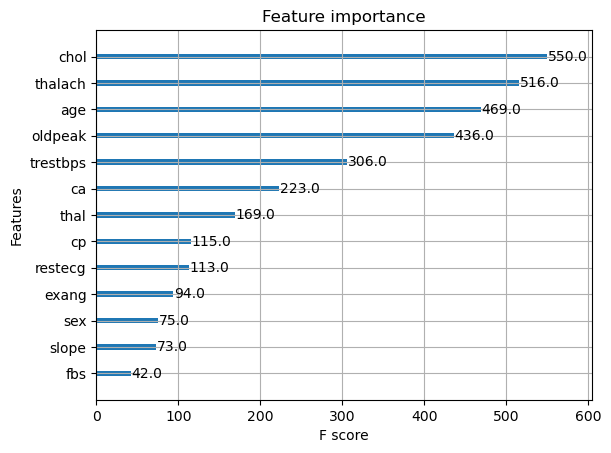

In [29]:
xgb.plot_importance(xgb_model)

([<matplotlib.axis.YTick at 0x1cae78fbb10>,
 [Text(0, 0, 'restecg'),
  Text(0, 1, 'chol'),
  Text(0, 2, 'trestbps'),
  Text(0, 3, 'age'),
  Text(0, 4, 'sex'),
  Text(0, 5, 'thalach'),
  Text(0, 6, 'slope'),
  Text(0, 7, 'oldpeak'),
  Text(0, 8, 'exang'),
  Text(0, 9, 'fbs'),
  Text(0, 10, 'thal'),
  Text(0, 11, 'ca'),
  Text(0, 12, 'cp')])

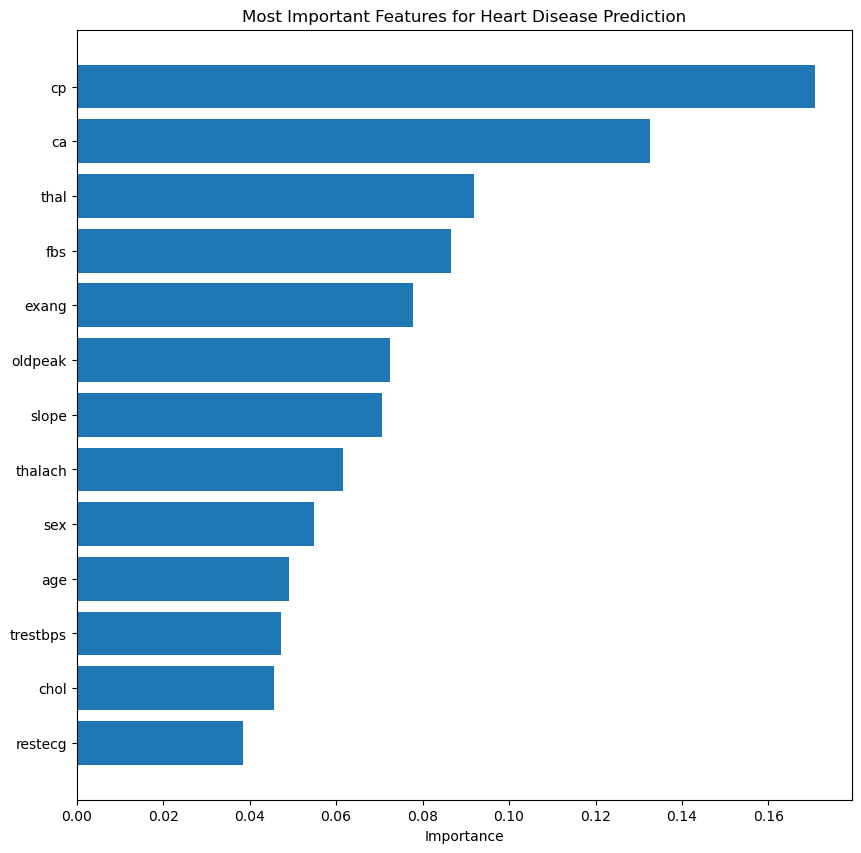

In [28]:
import matplotlib.pyplot as plt

feature_importance = xgb_model.feature_importances_

sorted_model = np.argsort(feature_importance)

fig = plt.figure(figsize=(10,10))
plt.barh(range(len(sorted_model)), feature_importance[sorted_model], align='center')
plt.title(f'Most Important Features for Heart Disease Prediction')
plt.xlabel('Importance')
plt.yticks(range(len(sorted_model)), np.array(X_test_imputed.columns)[sorted_model])


# Task 6: Model Evaluation
1. Compare the performance metrics of the initial model and the tuned model.
2. Visualize the improvement achieved in a clear and concise manner.
3. Discuss the impact of hyperparameter tuning and feature importance on model performance.

Initial Model Accuracy: 0.47540983606557374
Tuned Model Accuracy: 0.5573770491803278

Classification Report - Initial Model:
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.00      0.00      0.00        12
           2       0.20      0.22      0.21         9
           3       0.12      0.14      0.13         7
           4       0.00      0.00      0.00         4

    accuracy                           0.48        61
   macro avg       0.22      0.25      0.23        61
weighted avg       0.41      0.48      0.44        61


Classification Report - Tuned Model:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        29
           1       0.50      0.17      0.25        12
           2       0.25      0.11      0.15         9
           3       0.40      0.29      0.33         7
           4       0.00      0.00      0.00         4

    accuracy          

c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Discussion:
Hyperparameter tuning can significantly impact model performance.
The initial model may not have optimal hyperparameters, leading to suboptimal performance.
Through grid search, the tuned model achieves better accuracy.
Additionally, feature importance analysis can provide insights into the contribution of different features to the model's predictions.
This information is valuable for feature selection and understanding the model's decision-making process.


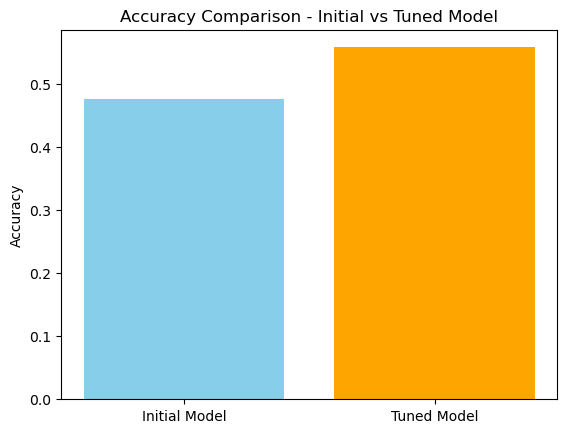

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initial model predictions on the test set
xgb_initial = xgb_model.predict(X_test_imputed)

# Evaluate the accuracy of the initial model
initial_accuracy = accuracy_score(y_test, xgb_initial)
print(f'Initial Model Accuracy: {initial_accuracy}')

# Evaluate the accuracy of the tuned model
tuned_accuracy = accuracy_score(y_test, xgb_tuned)
print(f'Tuned Model Accuracy: {tuned_accuracy}')

# Compare classification reports
print("\nClassification Report - Initial Model:")
print(classification_report(y_test, xgb_initial))

print("\nClassification Report - Tuned Model:")
print(classification_report(y_test, xgb_tuned))


# Visualize the improvement in accuracy
fig, ax = plt.subplots()
models = ['Initial Model', 'Tuned Model']
accuracy_values = [initial_accuracy, tuned_accuracy]
ax.bar(models, accuracy_values, color=['skyblue', 'orange'])
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison - Initial vs Tuned Model')

# Discuss the impact of hyperparameter tuning and feature importance
print("\nDiscussion:")
print("Hyperparameter tuning can significantly impact model performance.")
print("The initial model may not have optimal hyperparameters, which leads to a not very good performance.")
print("Feature importance analysis can provide insights into the contribution of different features to the model's predictions.")
print("This information is valuable for feature selection and understanding the model's decision-making process.")
